# Notes from TP4 Session on histograms and other stuff

### Import & util stuff

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import uint8 as u8, uint32 as u32, uint64 as u64, float64 as f64
from numpy.typing import NDArray
from PIL import Image
FIG_SIZE = (20, 10)


def imread(path: str, dtype: type = u8, grayscale: bool = False) -> NDArray:
    """
    Load the image at given path into a numpy array
    @param path: path to image (relative to this file)
    @param dtype: if float, returned image will be in the [0, 1] range, else in [0, 255] (defaults to uint8)
    @param grayscale: whether to load image as grayscale or not
    @return: NDArray of shape (m, n, 3) if grayscale is False, else (m, n)
    """
    img: Image = Image.open(path)
    if grayscale: img = img.convert('L')
    out = np.array(img)
    # does not check that max is indeed 1 because it would be too costly
    is_float = np.issubdtype(out.dtype, np.floating)
    if np.issubdtype(dtype, np.floating) and not is_float: out = f64(out / 255.)
    return out


def imshow_gray(data, show=True, axis=True):
    plt.imshow(data, cmap="gray")
    plt.axis("on" if axis else "off")
    if show: plt.show()


def imshow(data, show=True, axis=True):
    plt.imshow(data)
    plt.axis("on" if axis else "off")
    if show: plt.show()


def MSE(im1, im2):
    return np.sum((im1 - im2) ** 2) / (im1.shape[0] * im1.shape[1])


def image_plot(idx: int, data, title=None, col=4, row=1, gray=True):
    plt.subplot(row, col, idx + 1)
    plt.title(title if title else "")
    plt.axis("off")
    plt.imshow(data, cmap="gray" if gray else None)


## Histograms

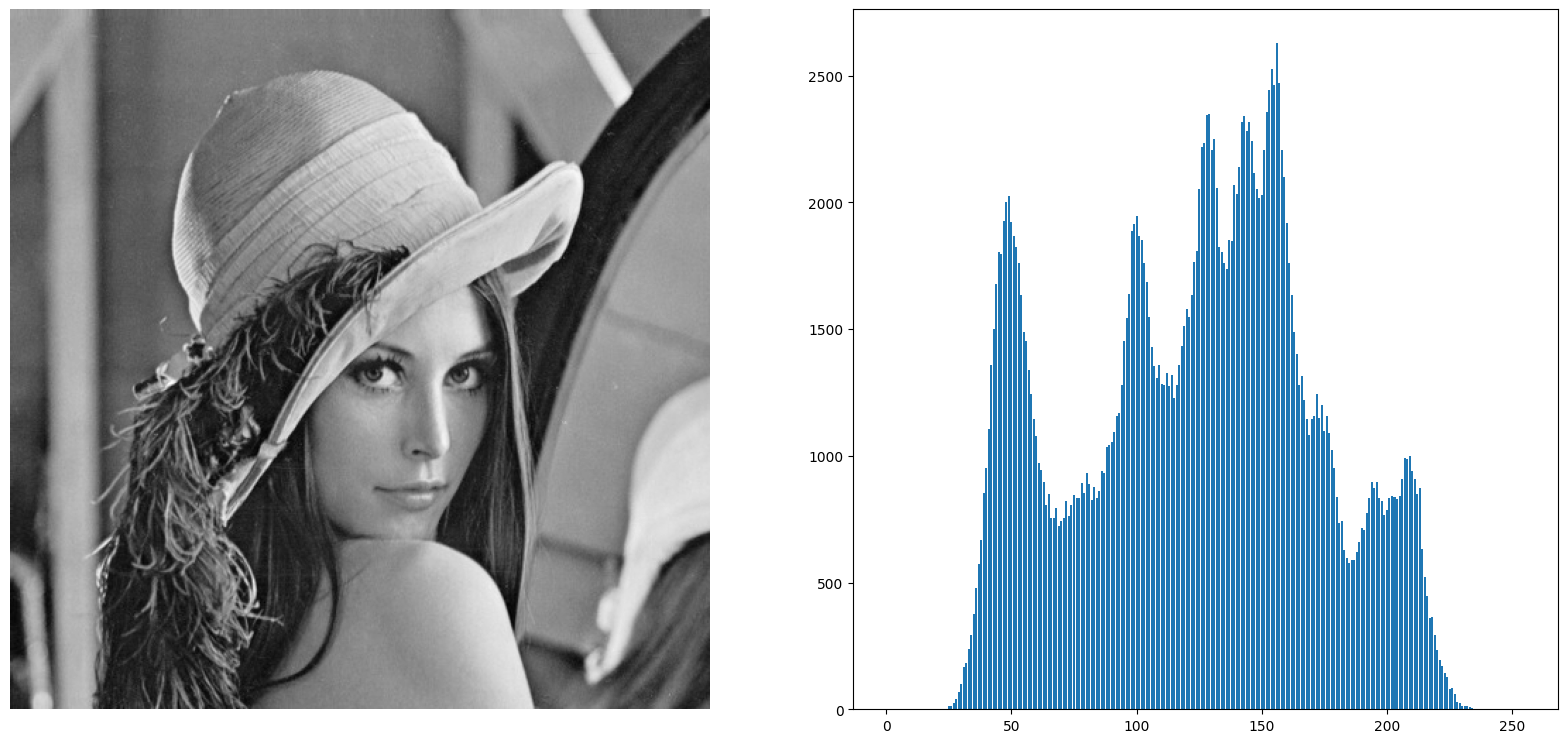

In [59]:
def get_hist(image: NDArray):
    hist, bin_edge = np.histogram(image, bins=256, range=(0, 256))
    return hist, bin_edge

# def manual_hist(image: NDArray):
#     count = np.zeros(256) # value at idx 0 to 255 will be nb of appearance of that value
#     for row in image:
#         for byte in row:
#             count[byte] += 1
#     return count
            

lena = imread("images/lena.png", grayscale=True)
img = lena
hist, img_bin = get_hist(lena)
hist_bin = get_hist(img_bin)

plt.figure(figsize=(20, 20))
image_plot(0, img, col=2, row=2)
# plt.subplot(221)
# plt.imshow(img, cmap="gray")
# plt.axis("off")
plt.subplot(222)
plt.bar(range(256), hist)
# image_plot(2, lena, col=2, row=2)
# plt.subplot(223)
# plt.imshow(lena, cmap="gray")
# plt.axis("off")
# plt.subplot(224)
# plt.bar(range(257), img_bin)
plt.show()
